In [26]:
import wandb
wandb.login()

True

In [27]:
import pandas as pd

In [28]:
run = wandb.init(
    project="Phishing dataset",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.01,
        "epochs": 10
    }
)

In [29]:
# it should be noted that some of this data was corrupted, so was removed.
data = pd.read_csv("urlset.csv", header="infer", encoding="utf-8")

In [30]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582,1
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95906,xbox360.ign.com/objects/850/850402.html,339,1,1,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906,0
95907,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1,0,3,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623,0
95908,www.gamespot.com/xbox360/action/deadspace/,753,1,1,3,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0
95909,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1,1,4,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0


In [31]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [32]:
y = data['label']

In [33]:
y

0        1
1        1
2        1
3        1
4        1
        ..
95906    0
95907    0
95908    0
95909    0
95910    0
Name: label, Length: 95911, dtype: int64

In [34]:
X = data.drop(['domain', 'label'], axis=1)

In [35]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1,0,18,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.800000,0.795729
1,10000000,0,0,11,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.768577
2,10000000,0,0,14,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.000000,0.726582
3,10000000,0,0,6,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.859640
4,10000000,0,0,8,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
95906,339,1,1,2,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906
95907,63029,1,0,3,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623
95908,753,1,1,3,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
95909,6,1,1,4,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42   
)

In [37]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [38]:
clf #intitialise

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [39]:
clf = clf.fit(X, y)

In [40]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [41]:
import pydotplus
from IPython.display import Image

In [42]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=["1", "0"], filled=True, out_file=None)

In [43]:
graph = pydotplus.graph_from_dot_data(dot_data)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.124662 to fit



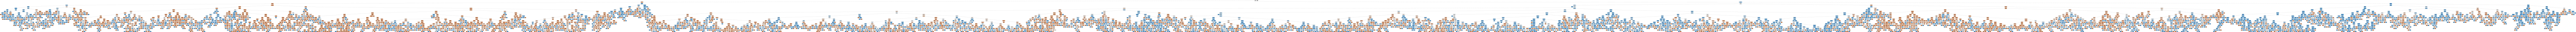

In [44]:
graph
Image(graph.create_png())

In [45]:
predY = clf.predict(X_test)

In [46]:
predY

array([0, 0, 0, ..., 0, 0, 1])

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test, predY)

0.9827341729919092

In [49]:
wandb.log({
    "accuracy": accuracy_score(y_test, predY)
})

In [50]:
wandb.finish()

accuracy,▁
accuracy,0.98273
